In [6]:
import numpy as np

from FRP_sensitivity_fA import create_output_dir, log_sample, solve_odes, sensitivity_analysis
from FRP_sensitivity_fA import save_params, save_ode_outputs, save_problem
from FRP_sensitivity_fA import load_data, load_params, load_ode_outputs, load_problem
from FRP_sensitivity_fA import plot_param_values, plot_ode_outputs, plot_sensitivity_grid

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Define output directory
output_dir = 'Experiments/FRP/0'
create_output_dir(output_dir)

Directory 'Experiments/FRP/0' already exists.


#### Define ODE Model

In [17]:
# Define parameter ranges
pbounds = [1e0, 1e2] # Propagation rate constant range
dbounds = [0.5e0, 0.5e2] # Depropagation rate constant range
fbounds = [0, 1]

frp_problem = {
    'num_vars': 6,
    'names': ['kpAA', 'kpAB', 'kpBA', 'kpBB', 'kdBB', 'fA'],
    'bounds': [pbounds, pbounds, pbounds, pbounds, dbounds, fbounds]
}
save_problem(frp_problem, output_dir)

#### Sample parameters

In [20]:
param_values = log_sample(frp_problem, 100)
print('Parameter values shape:', param_values.shape)

Parameter values shape: (1400, 6)


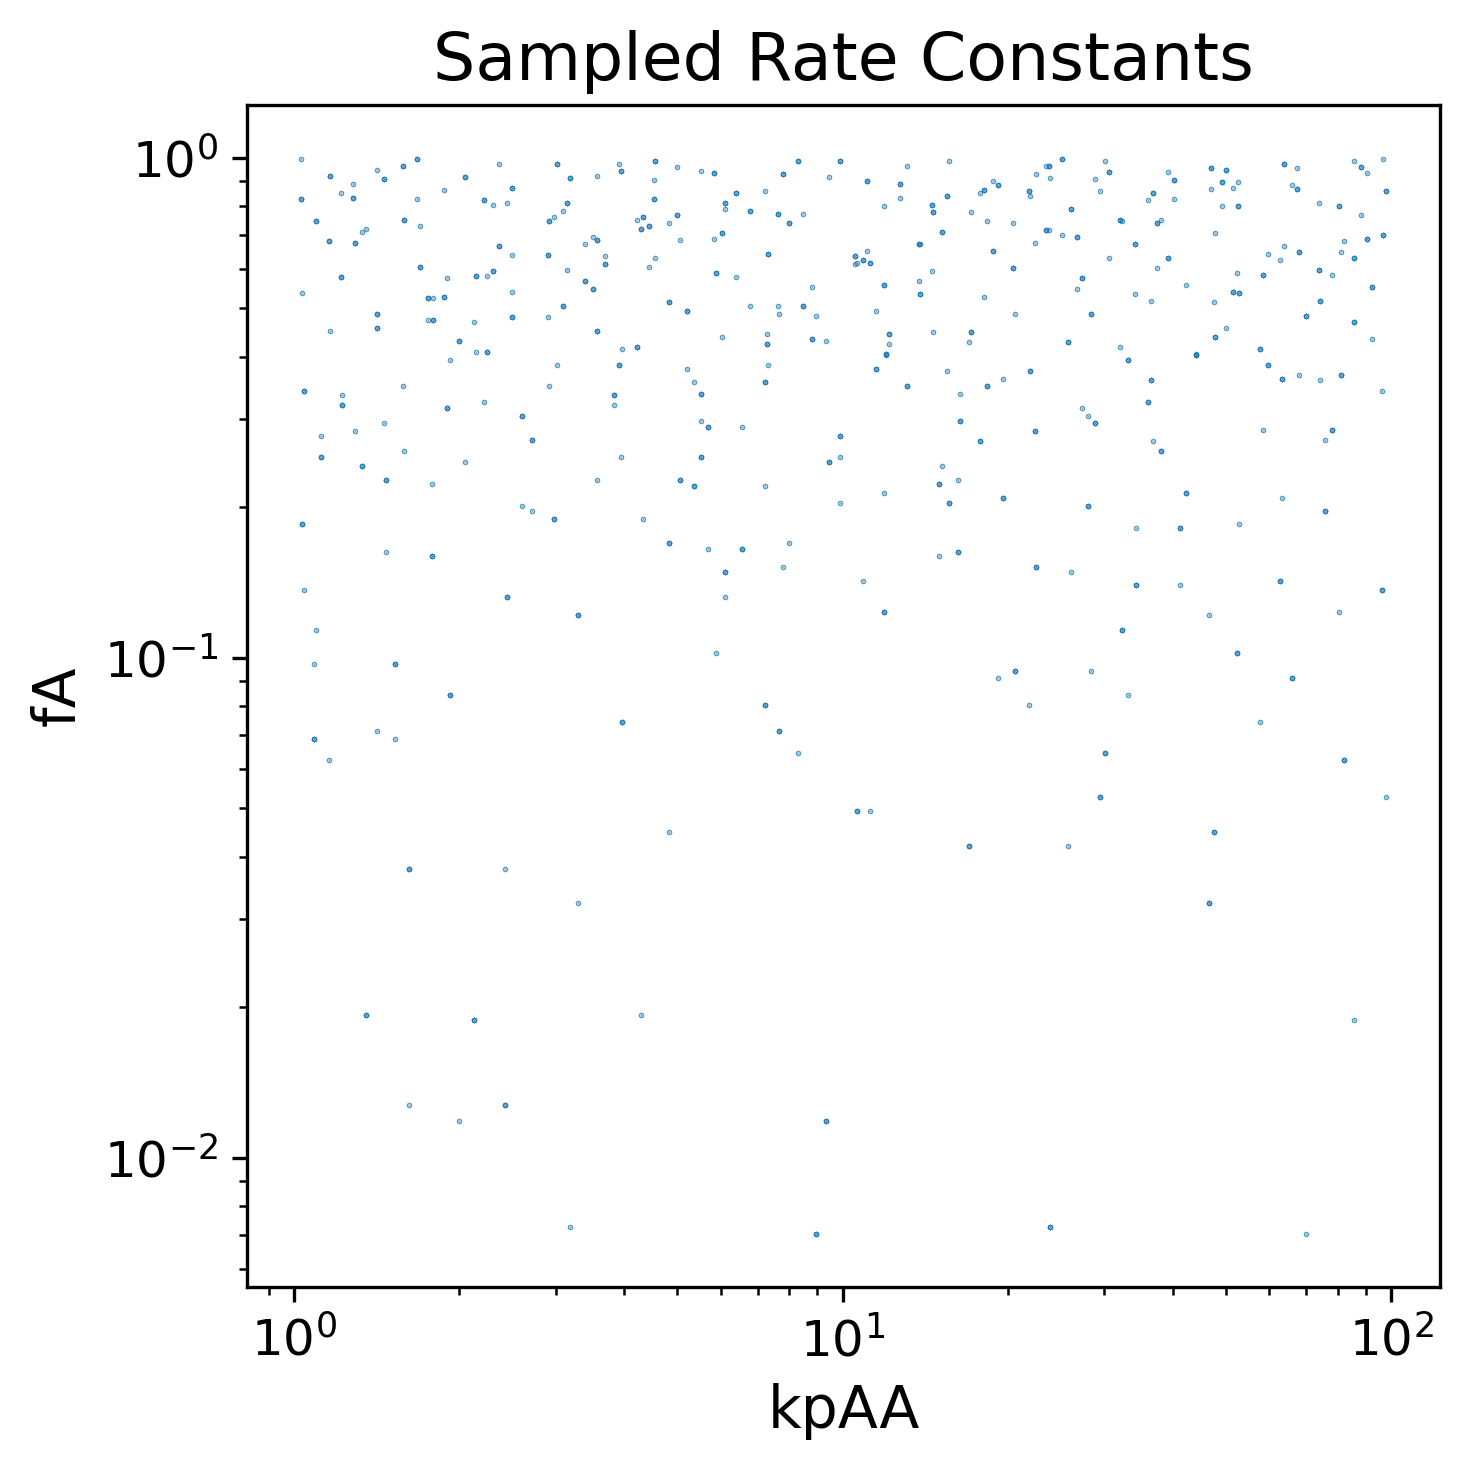

In [24]:
fig, ax = plot_param_values(param_values, 0, 5, names=frp_problem['names'])

In [25]:
save_params(param_values, output_dir)

#### Solve ODE Model for all parameters

In [7]:
# Define initial concentrations
I0 = 0.005
A0 = 1.5
B0 = 1.5

y0 = np.zeros(33)
y0[0] = I0
y0[2] = A0
y0[3] = B0

t, output_mat, output_names = solve_odes(param_values, time_points=20, y0=y0, tmax=200)
print('ODE outputs:', output_names)
print('Output matrix shape:', output_mat.shape)

1200it [03:52,  5.15it/s]

ODE outputs: ['[A]', '[B]', 'nAvgCL', 'nAvgSL A', 'nAvgSL B']
Output matrix shape: (1200, 20, 5)


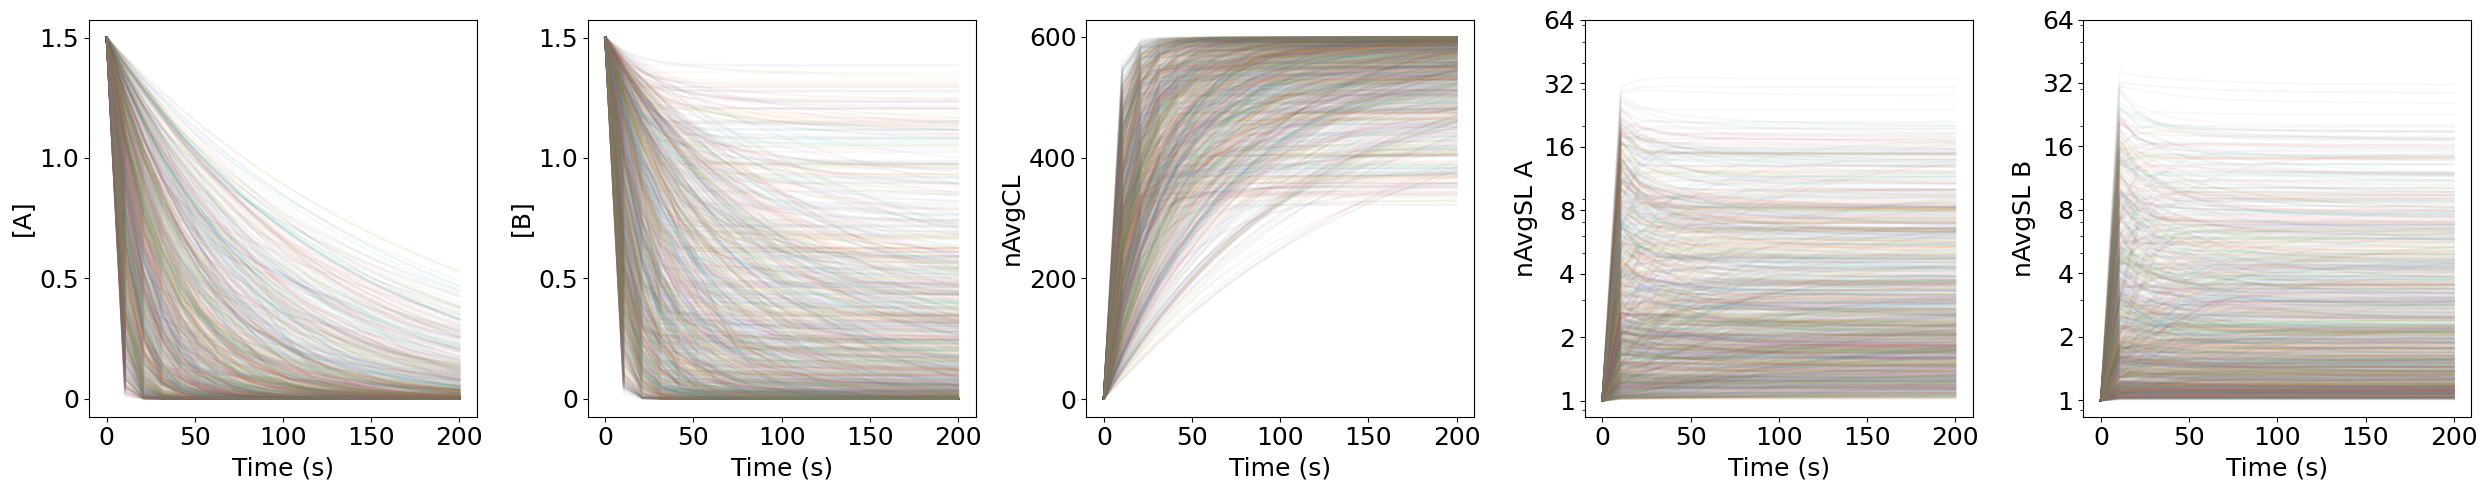

In [8]:
fig, axs = plot_ode_outputs(output_mat, output_names, t=t)

In [9]:
save_ode_outputs(output_mat, t, output_dir)

#### Perform sensitivity analysis

In [10]:
dfs = sensitivity_analysis(frp_problem, t, output_mat, output_dir=output_dir)

Performing sensitivity analysis on output 0 ...


20it [00:00, 103.62it/s]


Performing sensitivity analysis on output 1 ...


20it [00:00, 174.10it/s]


Performing sensitivity analysis on output 2 ...


20it [00:00, 178.62it/s]


Performing sensitivity analysis on output 3 ...


20it [00:00, 182.67it/s]


Performing sensitivity analysis on output 4 ...


20it [00:00, 174.12it/s]


In [11]:
fig, axs = plot_sensitivity_grid(frp_problem, dfs)

#### Load and plot data

In [12]:
input_dir = output_dir

problem = load_problem(input_dir)
param_values = load_params(input_dir)
t, output_mat = load_ode_outputs(input_dir)
dfs = load_data(input_dir)

problem

{'num_vars': 5,
 'names': ['kpAA', 'kpAB', 'kpBA', 'kpBB', 'kdBB'],
 'bounds': [[1.0, 100.0],
  [1.0, 100.0],
  [1.0, 100.0],
  [1.0, 100.0],
  [0.5, 50.0]]}

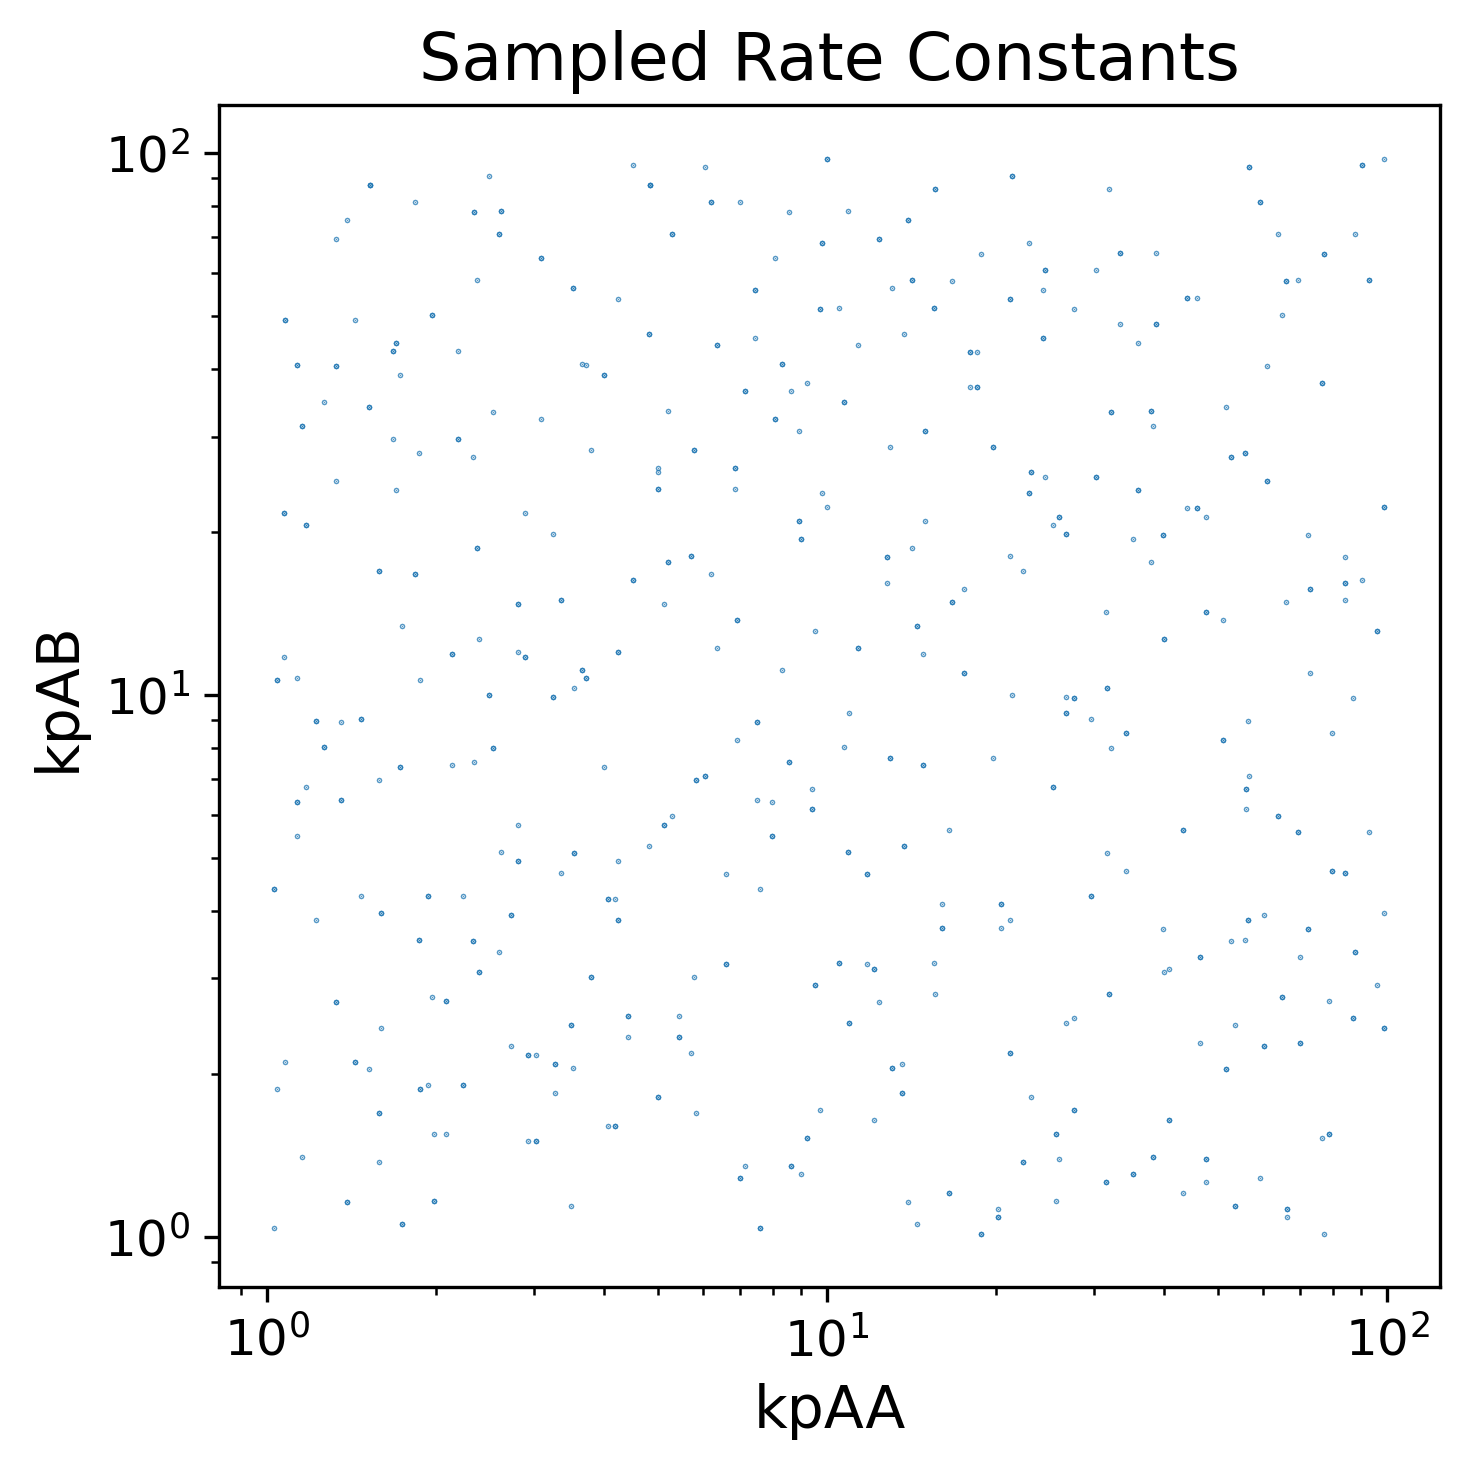

In [13]:
fig, ax = plot_param_values(param_values, idx1=0, idx2=1, names=frp_problem['names'])

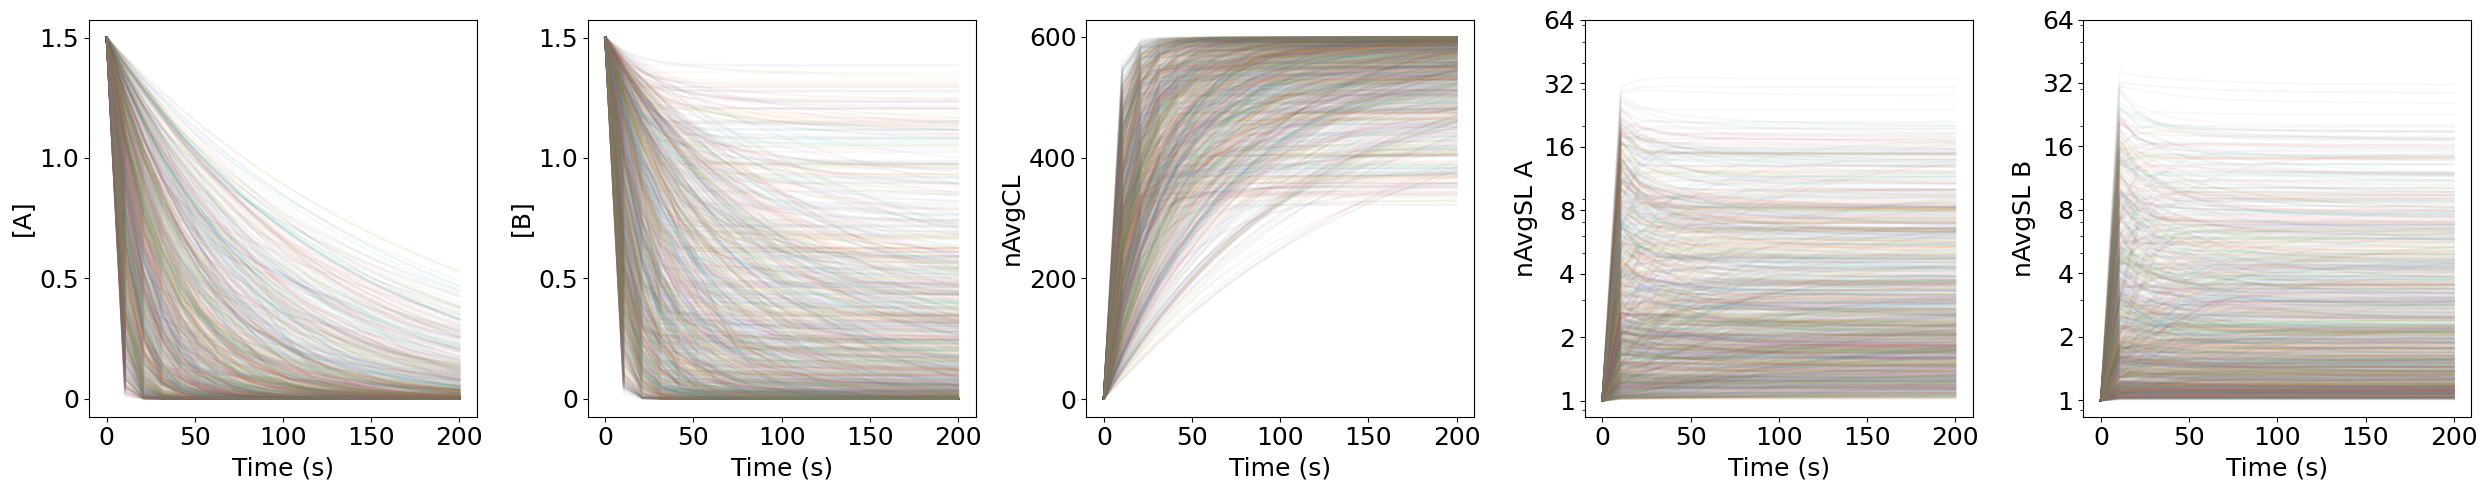

In [14]:
fig, axs = plot_ode_outputs(output_mat, output_names, t=t)

In [15]:
fig, axs = plot_sensitivity_grid(frp_problem, dfs)